In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import seaborn as sns; sns.set()
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

## plotly et l'exportation
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot

In [2]:
df = pd.read_csv('covid_pays_v2.csv')
df['continent'].isnull().values.any()

True

In [3]:
df['continent'].isnull().sum()

13

In [4]:
df[df['continent'].isna()]

,iso_code,continent,location,date,total_cases,total_deaths,population
1,OWID_AFR,NaN,Africa,4/29/2022,11666900,252878.0,1.373486e+09
11,OWID_ASI,NaN,Asia,4/29/2022,148759563,1428382.0,4.678445e+09
68,OWID_EUR,NaN,Europe,4/29/2022,192516327,1817425.0,7.489630e+08
69,OWID_EUN,NaN,European Union,4/29/2022,137123117,1075506.0,4.471899e+08
90,OWID_HIC,NaN,High income,4/29/2022,292974375,2373304.0,1.214930e+09
97,OWID_INT,NaN,International,4/29/2022,721,15.0,NaN
121,OWID_LIC,NaN,Low income,4/29/2022,1820585,43082.0,6.651490e+08
122,OWID_LMC,NaN,Lower middle income,4/29/2022,90603114,1307985.0,3.330653e+09
152,OWID_NAM,NaN,North America,4/29/2022,96281844,1430695.0,5.965813e+08
155,OWID_OCE,NaN,Oceania,4/29/2022,7155423,10621.0,4.321995e+07


In [5]:
df_rectified = df.dropna(subset=['continent']) ## on supprime les lignes où continent est null car présence de Afrique en location avec continent NaN
df_rectified

,iso_code,continent,location,date,total_cases,total_deaths,population
0,AFG,Asia,Afghanistan,4/29/2022,178873,7683.0,39835428.0
2,ALB,Europe,Albania,4/29/2022,275055,3496.0,2872934.0
3,DZA,Africa,Algeria,4/29/2022,265779,6875.0,44616626.0
4,AND,Europe,Andorra,4/29/2022,41349,153.0,77354.0
5,AGO,Africa,Angola,4/29/2022,99287,1900.0,33933611.0
...,...,...,...,...,...,...,...
222,VNM,Asia,Vietnam,4/29/2022,10644700,43038.0,98168829.0
223,WLF,Oceania,Wallis and Futuna,4/29/2022,454,7.0,11094.0
225,YEM,Asia,Yemen,4/29/2022,11818,2149.0,30490639.0
226,ZMB,Africa,Zambia,4/29/2022,319594,3976.0,18920657.0


In [6]:
df_rectified['continent'].isnull().sum() ## affiche le nombre de lignes contenant null dans la case continent

0

In [7]:
Xx = df_rectified.iloc[:, [4,5]] ## récupère la 5 et la 6ème ligne avec toutes les lignes/ all the rows but columns only 5th n 6th
X = Xx.fillna(0)
labels = df_rectified.iloc[:, 0].values

In [8]:
X

,total_cases,total_deaths
0,178873,7683.0
2,275055,3496.0
3,265779,6875.0
4,41349,153.0
5,99287,1900.0
...,...,...
222,10644700,43038.0
223,454,7.0
225,11818,2149.0
226,319594,3976.0


In [9]:
labels

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM',
       'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR',
       'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN',
       'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG',
       'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD',
       'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI',
       'EST', 'SWZ', 'ETH', 'FRO', 'FLK', 'FJI', 'FIN', 'FRA', 'PYF',
       'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD',
       'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL',
       'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM',
       'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO',
       'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC',
       'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MRT', 'MUS',
       'MEX', '

In [10]:
pca = PCA(n_components = 0.9)
pca.fit(X)

PCA(n_components=0.9)

In [11]:
print(pca.explained_variance_ratio_)

[0.999969]


avec un seul axe on garde 99% de l'information

In [12]:
pca = PCA()
pca.fit(X)
ratio = pca.explained_variance_ratio_
ratio

array([9.99969002e-01, 3.09983185e-05])

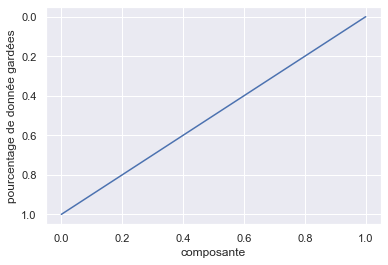

In [13]:
plt.plot(ratio)
plt.gca().invert_yaxis()
plt.xlabel('composante')
plt.ylabel('pourcentage de donnée gardées')
plt.show()

In [14]:
pca.components_

array([[ 0.99993049,  0.01179082],
       [-0.01179082,  0.99993049]])

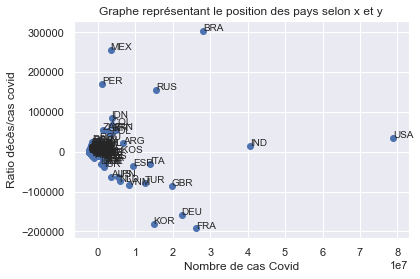

<Figure size 432x288 with 0 Axes>

In [15]:
plt.rcParams["figure.figsize"] = (10, 5)
X_pca = pca.transform(X)
%matplotlib inline
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for l, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(l, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.xlabel("Nombre de cas Covid")
plt.ylabel("Ratio décès/cas covid")
plt.title("Graphe représentant le position des pays selon x et y")
## ordre super important ci-dessous, après l'appel de plt.show() une nouvelle figure est crées donc soit on appel
## savefig avant show() ou save fig avec gcf() l'afficher puis lui faire un savefig() meme après le show()

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('Created_by_sk_learn/basic_graph.png', dpi=150)

##fig = plt.figure()
##fig.savefig('basic_graph.png', bbox_inches='tight')
##plt.savefig('basic_graph.jpg',bbox_inches='tight', dpi=150)
##plotly.offline.plot(fig, include_plotlyjs=False, output_type='div')
##plt.show()

la position des villes dépend des valeurs de pca.components_ et du poids associées

 - plus on va à droite plus y'a de cas de covid ( vice versa on va à gauche moins de contaminés).
 - plus on monte plus y'a un nombre de décès important comparé au nombre de cas.
 - plus on descend au négatif -> plus y'a de personnes guéris que de décès, pourcentage de mort relativement bas comparé au nombre de cas de covid.
 
 - plus on est à gauche et en haut -> pourcentage de mort élevé comparé au nombre de contaminé <br>
     - par ex : la france a plus de contaminé par rapport à la GBR(Grait Britain) mais un ratio décès par contamination meilleur pour la france.
     - on peut donc remarquer les pire pays face à la covid(en terme de ratio nombre de contaminé/nombre de décès):
         - mexique, Perou, russie, brésil
 - plus on est à gauche et en bas(en négatif) -> 
    - on peut s'apercevoir que les pays qui font le mieux face à la covid-19 sont ceux à droite(
 
 
 

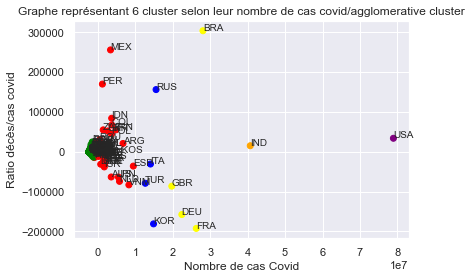

<Figure size 432x288 with 0 Axes>

In [16]:
colors=['red','yellow','blue','pink','green', 'orange', 'purple']

aggClustering = AgglomerativeClustering(linkage='ward', n_clusters=6).fit(X)
clustering_ward = aggClustering.labels_

plt.scatter(X_pca[:,0], X_pca[:,1], c=clustering_ward, cmap=matplotlib.colors.ListedColormap(colors))
for label,x,y in zip(labels, X_pca[:,0], X_pca[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-0.2,0.2), textcoords='offset points')
plt.xlabel("Nombre de cas Covid")
plt.ylabel("Ratio décès/cas covid")
plt.title("Graphe représentant 6 cluster selon leur nombre de cas covid/agglomerative cluster")   
fig2 = plt.gcf()
plt.show()
plt.draw()
fig2.savefig('Created_by_sk_learn/agglo_cluster_graph.png', dpi=150)

Création de cluster en fonction du nombre de cas de covid

In [17]:
import seaborn as sns; sns.set()

In [18]:
from sklearn.cluster import KMeans
X_acp = KMeans(n_clusters = 5)
X_acp.fit(X)
y_kmeans = X_acp.predict(X)

 - Création de cluster en utilisant la méthode KMeans C’est l’un des algorithmes de clustering les plus répandus. Il permet d’analyser un jeu de données caractérisées par un ensemble de descripteurs, afin de regrouper les données “similaires” en groupes (ou clusters).

In [19]:
XY = X.values

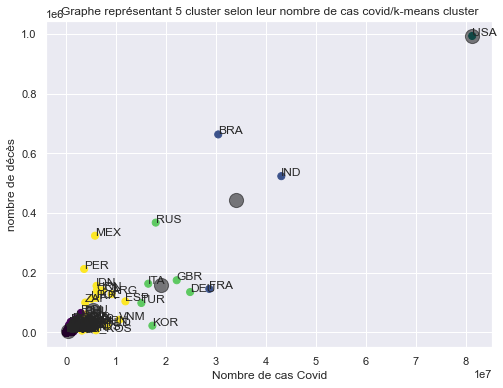

<Figure size 432x288 with 0 Axes>

In [20]:
plt.scatter(XY[:, 0], XY[:, 1], c = y_kmeans, s = 50, cmap= 'viridis')
for label, x, y in zip(labels, XY[:, 0], XY[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
centers = X_acp.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s=200, alpha= 0.5)

plt.xlabel("Nombre de cas Covid")
plt.ylabel("nombre de décès")
plt.title("Graphe représentant 5 cluster selon leur nombre de cas covid/k-means cluster")   
fig3 = plt.gcf()
fig3.set_size_inches(8, 6)
plt.show()
plt.draw()
fig3.savefig('Created_by_sk_learn/k-means_cluster_graph.png', dpi=150)

 - 5 clusters avec un point central pour
    - x => nombre de cas 
    - y => nombre de décès

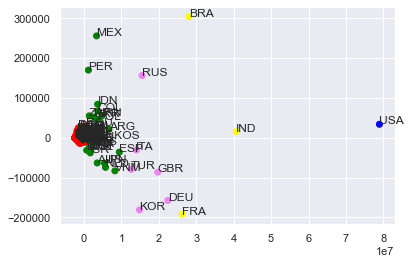

In [21]:
colors = ['red','yellow','blue','violet','green']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= y_kmeans, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

- test des modes de clustering
    - test de linkage = ward ci-dessous

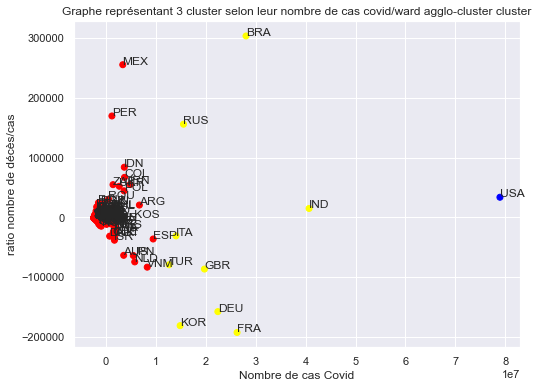

<Figure size 432x288 with 0 Axes>

In [22]:
colors=['red','yellow','blue']

aggClustering = AgglomerativeClustering(linkage='ward', n_clusters=3).fit(X)
clustering_ward = aggClustering.labels_

plt.scatter(X_pca[:,0], X_pca[:,1], c=clustering_ward, cmap=matplotlib.colors.ListedColormap(colors))
for label,x,y in zip(labels, X_pca[:,0], X_pca[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-0.2,0.2), textcoords='offset points')

plt.xlabel("Nombre de cas Covid")
plt.ylabel("ratio nombre de décès/cas")
plt.title("Graphe représentant 3 cluster selon leur nombre de cas covid/ward agglo-cluster cluster")   
fig4 = plt.gcf()
fig4.set_size_inches(8, 6)
plt.show()
plt.draw()
fig4.savefig('Created_by_sk_learn/ward_agglo_cluster_graph.png', dpi=150)

 - test de linkage = avergae ci-dessous

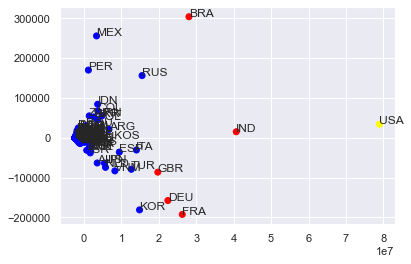

In [23]:
aggClustering = AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=3).fit(X)
clustering_average = aggClustering.labels_

plt.scatter(X_pca[:,0], X_pca[:,1], c=clustering_average, cmap=matplotlib.colors.ListedColormap(colors))
for label,x,y in zip(labels, X_pca[:,0], X_pca[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-0.2,0.2), textcoords='offset points')
plt.show()

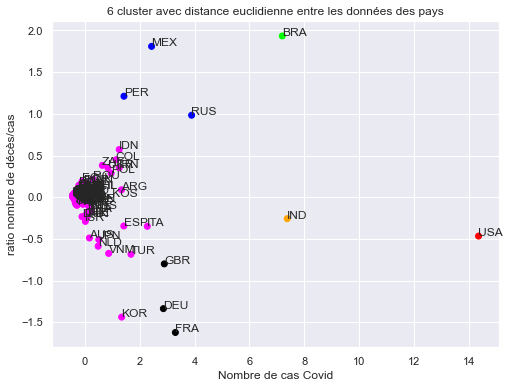

<Figure size 432x288 with 0 Axes>

In [24]:
# Normalisation
SS = StandardScaler()
Xnorm = SS.fit_transform(X)
    
# Clustering temporaire par la méthode des K-Means
modelTemp = KMeans(n_clusters=10, random_state=1)
labelKmean = modelTemp.fit_predict(Xnorm)
    
# Récupération des barycentres
centroids = modelTemp.cluster_centers_

model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
labelCAH = model.fit_predict(centroids)
    
# Affectation des clusters finaux
clustering = []
for cluster in labelKmean:
    clustering.append(labelCAH[cluster])

# PCA
pca = PCA(n_components=2)
pca.fit(Xnorm)
Xpca = pca.transform(Xnorm) 

# Affichage
colors = ['blue', 'magenta', 'lime', 'red', 'black', 'orange']
plt.scatter(Xpca[:,0], Xpca[:,1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, Xpca[:,0], Xpca[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-0.2,0.2), textcoords='offset points')

plt.xlabel("Nombre de cas Covid")
plt.ylabel("ratio nombre de décès/cas")
plt.title("6 cluster avec distance euclidienne entre les données des pays")   
fig5 = plt.gcf()
fig5.set_size_inches(8, 6)
plt.show()
plt.draw()
fig5.savefig('Created_by_sk_learn/euclidian_cluster_graph.png', dpi=150)

 - linkage = single, ci dessous

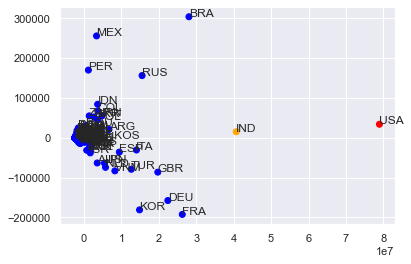

In [25]:
aggClustering = AgglomerativeClustering(linkage='single', n_clusters=3).fit(X)
clustering_single = aggClustering.labels_

plt.scatter(X_pca[:,0], X_pca[:,1], c=clustering_single, cmap=matplotlib.colors.ListedColormap(colors))
for label,x,y in zip(labels, X_pca[:,0], X_pca[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-0.2,0.2), textcoords='offset points')
plt.show()

les avantages et les inconvénients des méthodes de classification hiérarchiques 
(AgglomerativeClustering) et celles de partitionnement (KMeans).

KMeans

Avantage :

- C'est un algorithme simple, et rapide pour identifier des groupes à partir d'ensembles de données complexes. 
- Fonctionne bien pour identifier des clusters très proches.
- Il renvoit un partionnement très facile à interpéter.

Inconvéniants :

- L'initialisation des groupes se fait aléatoirement. L'agorithme n'est donc pas déterministe. Il peut donner des résultats différents quand on le fait tourner plusieurs fois. Certains de ces résultats peuvent être très mauvais.
- On doit connaitre le nombre de clusters avec lequel lancé l'algorithme à l'avance.
- On ne peut pas trouver l'ensemble le plus optimal de clusters pour cette algorithme. On serait obligé de le lancer avec tous les nombres de groupes possibles pour pouvoir déduire une telle information.
- L'ordre dans lequel sont présentées les valeurs a une inscidence sur les groupes rendus à la fin.
- Il est difficile de comparer la qualité des clusters comme l'algorithme n'est pas déterministe.

Agglomerative Clustering

Avantages :

- On n'a pas besoin de définir le nombre de cluster à l'avance car on explore toutes les possibilités. De plus, on peut explorer la pertinence des partitions trouvées et donc déterminer quel nombre de cluster est le plus optimal pour un jeu de données.
- Grâce aux différentes méthodes d'agrégation on a le choix du type de distance et on peut l'adapter en fonction des besoins et du jeu de données pour avoir les meilleurs groupes possible.
- Fonctionne bien sur les petits jeu de données car il existe un nombre de groupe maximum faible et donc l'algorithme est réalisé rapidement et donne des résultats très pertinant.
- Permet d'avoir des groupes les plus homogènes possibles.

Inconvenients :

- L'algorithme a une complexité lourde. Chaque itération de l'algorithme nécessite de calculer toutes les distances entre toutes les données 2 à 2, de les stocker, ... C'est un coût très élevé (quadratique en complexité temporelle et en espace mémoire).
- Il n'est donc pas très adapté aux jeu de données de grande taille.

In [26]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
Xnorm = SS.fit_transform(X)
for i in range(2,7):
    model = KMeans(n_clusters=i)
    model.fit(Xnorm)
    print("avec", i, "classes:", round(metrics.silhouette_score(Xnorm, model.labels_, metric = 'euclidean'),2))

avec 2 classes: 0.93
avec 3 classes: 0.85
avec 4 classes: 0.85
avec 5 classes: 0.82
avec 6 classes: 0.8


 - L'indice silhouette est maximale avec 2 classes, donc utilisation de 2 cluster serait l'option optimal

In [27]:
def hybride(data, CAH_min=2, K_clusters=10):
    # data - array 2D correspondant aux valeurs du dataset,
    # CAH_min - nombre de clusters minimums souhaités (2 par défaut et 6 maximum)
    # K_clusters - nombre de clusters utilisés par K-Means / nombre de données d'entrée pour CAH
    if CAH_min > 6 :
        return "ERREUR - CAH_min supérieur à 6"

# Normalisation
    SS = StandardScaler()
    Xnorm = SS.fit_transform(data)
    
    
# Clustering temporaire par la méthode des K-Means
    modelTemp = KMeans(n_clusters=K_clusters, random_state=1)
    labelKmean = modelTemp.fit_predict(Xnorm)
    
    
# Récupération des barycentres
    centroids = modelTemp.cluster_centers_
    
    
# Clustering par la méthode CAH sur les barycentres

    # Optimisation de l'indice Silhouette
    maximum = 0;
    for crit in ('ward','average','single'):
        for n in range(CAH_min,7):
            model = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage=crit)
            model.fit(Xnorm)
            silhouette = metrics.silhouette_score(Xnorm, model.labels_, metric = 'euclidean')
            if silhouette > maximum:
                maximum = silhouette
                critOpti = crit
                classeOpti = n
    print(">>> CAH optimal pour le critère", critOpti, "sur", classeOpti, "classes:\n    Indice silhouette =",round(maximum,2))
    
    # Clustering optimal
    model = AgglomerativeClustering(n_clusters=classeOpti, affinity='euclidean', linkage=critOpti)
    labelCAH = model.fit_predict(centroids)
    
    
# Affectation des clusters finaux
    clustering = []
    for cluster in labelKmean:
        clustering.append(labelCAH[cluster])
        

# PCA
    pca = PCA(n_components=2)
    pca.fit(Xnorm)
    perte = round(100-np.sum(pca.explained_variance_ratio_)*100, 2)
    print("\n>>> Passage en 2 dimensions:\n    Perte d'information de", perte, "%")
    Xpca = pca.transform(Xnorm)


# Affichage
    colors = ['blue', 'magenta', 'lime', 'red', 'black', 'orange']
    plt.scatter(Xpca[:,0], Xpca[:,1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
    for label, x, y in zip(labels, Xpca[:,0], Xpca[:,1]):
        plt.annotate(label, xy=(x,y), xytext=(-0.2,0.2), textcoords='offset points')
    return plt.show()

>>> CAH optimal pour le critère single sur 2 classes:
    Indice silhouette = 0.94

>>> Passage en 2 dimensions:
    Perte d'information de 0.0 %


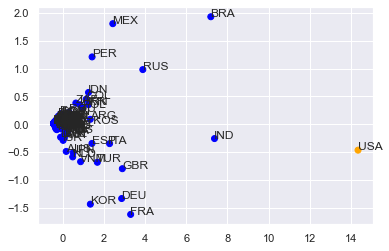

In [28]:
hybride(X)

>>> CAH optimal pour le critère average sur 3 classes:
    Indice silhouette = 0.91

>>> Passage en 2 dimensions:
    Perte d'information de 0.0 %


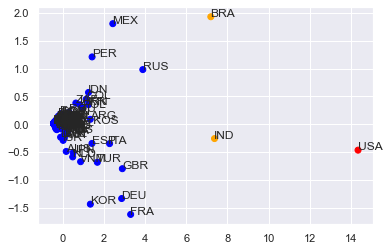

In [29]:
hybride(X,3)

>>> CAH optimal pour le critère average sur 6 classes:
    Indice silhouette = 0.85

>>> Passage en 2 dimensions:
    Perte d'information de 0.0 %


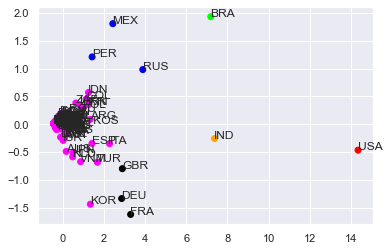

In [30]:
hybride(X,6)

 - En augmentant le nombre de cluster on peut diviser les pays en petit groupe avec comme points commun :
    - FRA et GBR qui ont un nombre de contaminés proche ainsi que le ratio décès/contamination.
    - la RUS, MEX, PER qui ont un nombre de contaminés plus ou moins rapprochant au GBR et la FRA, mais contrairement à ses derniers un ratio décès/contamination assez élevés(mauvais signe, les gens contaminés ont moins de chance de survivre, les 3 pays avec le plus mauvais ratio, on peut inclure le brésil dans ces 3 pays, meme si le brésil a le double de contamination que la russie).
    - l'IND et les USA avec le plus de contamination mais qui ont un ratio décès/contamination assez bas( moins de décès par rapport au nombre de cas de covid, les 2 pays avec le plus de contaminés au monde)
    - tout le reste du groupe bleu qui ont moins de 11m de cas covid et un ratio décès/contamination compris entre [-0.5 - 1]